In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct, os

In [2]:
from utils.latticeeasy import *
from utils.extract_utils import *
from utils.gmon import get_mass

In [3]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 10})
rc('text', usetex=True)
rc('image', cmap='gist_heat_r')
rc('axes', **{'titlesize': 10})

plt.rcParams['axes.axisbelow'] = True

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load data

In [230]:
output_dir_1 = "/media/yangelaxue/TRANSFER/Colliding_Oscillons/alpha_beta-0.05_100_200.450623/osc41_128"
output_dir_2 = "/media/yangelaxue/TRANSFER/Colliding_Oscillons/alpha_beta-0.05_100_200.450623/osc29_128"

In [231]:
data_1 = LATTICEEASY(output_dir_1)
data_2 = LATTICEEASY(output_dir_2)

data_1.domain_width_pr, data_2.domain_width_pr

(array([0.229687, 0.229687, 0.229687]), array([0.257812, 0.257812, 0.257812]))

In [232]:
assert data_2.domain_width_pr[0]>=data_1.domain_width_pr[0]

osc1 = "osc41"
osc2 = "osc29"

In [233]:
data_1.__dict__, data_2.__dict__

({'output_dir': '/media/yangelaxue/TRANSFER/Colliding_Oscillons/alpha_beta-0.05_100_200.450623/osc41_128',
  'alpha': 0.05,
  'beta': 100.0,
  'phi_0': 0.054515,
  'dt_pr': 0.001,
  'domain_width_pr': array([0.229687, 0.229687, 0.229687]),
  'domain_dimensions': (128, 128, 128),
  't': array([ 0.499997,  1.500014,  2.000037,  2.999965,  3.999892,  4.99982 ,
          5.999747,  6.999675,  7.999603,  8.499805,  9.000008,  9.50021 ,
         10.000412, 10.500614, 11.000816, 11.501019, 12.001221, 12.501423,
         13.001625, 13.501827, 14.002029, 14.502232, 15.002434, 15.502636,
         16.002834, 17.002285, 18.001736, 19.001186, 20.000637, 21.000088,
         21.999538, 22.998989, 23.99844 , 24.99789 , 25.997341, 26.996792,
         27.996243, 28.995693, 29.995144, 30.994595, 31.994045, 32.993496,
         33.992947, 34.992397, 35.991848, 36.991299, 37.990749, 38.9902  ,
         39.989651, 40.989101, 41.988552, 42.988003, 43.987453, 44.986904,
         45.986355, 46.985806, 47.985256

In [234]:
assert data_1.alpha==data_2.alpha
assert data_1.beta==data_2.beta
assert data_1.phi_0==data_2.phi_0

alpha = data_1.alpha
beta = data_1.beta
phi_0 = data_1.phi_0

assert data_1.rescale_s==data_2.rescale_s
rescale_s = data_1.rescale_s

In [235]:
with open(os.path.join(output_dir_1,f"{osc1}.img"),'rb') as f:
    
    n_points = np.product(data_1.domain_dimensions)
    
    file_content = f.read()
    idx, = struct.unpack("i" * 1, file_content[:4])
    t_start, = struct.unpack("f" * 1, file_content[4:8])
    a, = struct.unpack("f" * 1, file_content[8:12])
    ap, = struct.unpack("f" * 1, file_content[12:16])
    
    phi_1 = struct.unpack("f" * n_points, file_content[16:16+4*n_points])
    phip_1 = struct.unpack("f" * n_points, file_content[16+4*n_points:])
    
with open(os.path.join(output_dir_2,f"{osc2}.img"),'rb') as f:
    
    n_points = np.product(data_2.domain_dimensions)
    
    file_content = f.read()
    idx, = struct.unpack("i" * 1, file_content[:4])
    t_start, = struct.unpack("f" * 1, file_content[4:8])
    a, = struct.unpack("f" * 1, file_content[8:12])
    ap, = struct.unpack("f" * 1, file_content[12:16])
    
    phi_2 = struct.unpack("f" * n_points, file_content[16:16+4*n_points])
    phip_2 = struct.unpack("f" * n_points, file_content[16+4*n_points:])

phi_1 = np.array(phi_1).reshape(data_1.domain_dimensions)
phip_1 = np.array(phip_1).reshape(data_1.domain_dimensions)
phi_1 = phi_1 - data_1.dt_pr/2 * phip_1

phi_2 = np.array(phi_2).reshape(data_2.domain_dimensions)
phip_2 = np.array(phip_2).reshape(data_2.domain_dimensions)
phi_2 = phi_2 - data_2.dt_pr/2 * phip_2

In [236]:
Edens_1 = get_Edens_pr(phi_1,phip_1, a, ap, alpha, beta, phi_0, data_1.domain_width_pr/data_1.domain_dimensions)
Edens_2 = get_Edens_pr(phi_2,phip_2, a, ap, alpha, beta, phi_0, data_2.domain_width_pr/data_2.domain_dimensions)

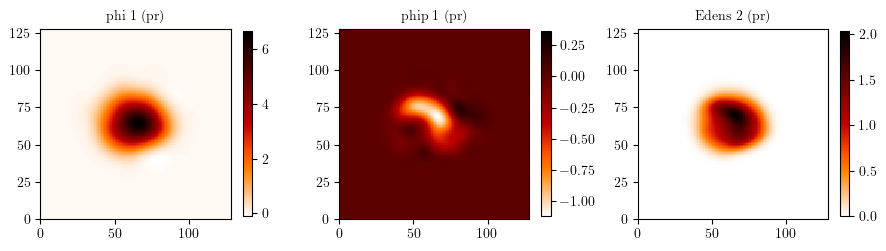

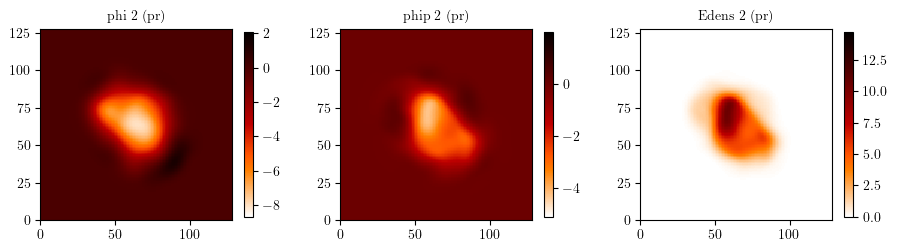

In [237]:
_slice = 64

fig, axes = plt.subplots(1,3,figsize=(9,4),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(phi_1[:,_slice],
              vmin=phi_1.min(), vmax=phi_1.max(),
              )
axes[0].set_title("phi 1 (pr)")
fig.colorbar(mesh,shrink=.5)

mesh = axes[1].pcolormesh(phip_1[:,_slice],
              vmin=phip_1.min(), vmax=phip_1.max(),
              )
axes[1].set_title("phip 1 (pr)")
fig.colorbar(mesh,shrink=.5)

mesh = axes[2].pcolormesh(Edens_1[:,_slice],
              vmin=Edens_1.min(), vmax=Edens_1.max(),
              )
axes[2].set_title("Edens 2 (pr)")
fig.colorbar(mesh,shrink=.5)

plt.show()

fig, axes = plt.subplots(1,3,figsize=(9,4),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(phi_2[:,_slice],
              vmin=phi_2.min(), vmax=phi_2.max(),
              )
axes[0].set_title("phi 2 (pr)")
fig.colorbar(mesh,shrink=.5)

mesh = axes[1].pcolormesh(phip_2[:,_slice],
              vmin=phip_2.min(), vmax=phip_2.max(),
              )
axes[1].set_title("phip 2 (pr)")
fig.colorbar(mesh,shrink=.5)

mesh = axes[2].pcolormesh(Edens_2[:,_slice],
              vmin=Edens_2.min(), vmax=Edens_2.max(),
              )
axes[2].set_title("Edens 2 (pr)")
fig.colorbar(mesh,shrink=.5)

plt.show()

# Inpterpolate oscillons to same size

In [238]:
data_1.domain_width_pr, data_2.domain_width_pr, data_1.domain_width_pr/data_2.domain_width_pr*128

(array([0.229687, 0.229687, 0.229687]),
 array([0.257812, 0.257812, 0.257812]),
 array([114.03633656, 114.03633656, 114.03633656]))

In [239]:
L_pr = data_1.domain_width_pr#*shape_ext/data_1.domain_dimensions
L_pr

array([0.229687, 0.229687, 0.229687])

In [240]:
shape_cr = tuple(data_2.domain_dimensions*(data_1.domain_width_pr/data_2.domain_width_pr))
shape_cr = int(shape_cr[0])
shape_cr = (shape_cr, shape_cr, shape_cr)
shape_cr

(114, 114, 114)

In [241]:
def crop_volume(center, shape_cr, *vals):
    
    shape = vals[0].shape
    for val in vals:
        assert val.shape==shape
    
    vals_sh = shift_volume(center, *vals)
    
    slices = tuple([slice(shape_x//2-shape_cr_x//2,shape_x//2+shape_cr_x//2,1) for shape_x,shape_cr_x in zip(shape,shape_cr)])
    vals_sh_cr = tuple(val_sh[slices] for val_sh in vals_sh)
    
    return vals_sh_cr

In [242]:
phi_2_cr, phip_2_cr = crop_volume(tuple(dim//2 for dim in data_2.domain_dimensions), shape_cr, phi_2, phip_2)
phi_2_cr.shape, phip_2_cr.shape, data_2.domain_width_pr*shape_cr/data_1.domain_dimensions, data_1.domain_width_pr

((114, 114, 114),
 (114, 114, 114),
 array([0.22961381, 0.22961381, 0.22961381]),
 array([0.229687, 0.229687, 0.229687]))

In [243]:
shape_i = (128,128,128)

In [244]:
phi_2_i, phip_2_i = interpolate(shape_i, phi_2_cr, phip_2_cr)
phi_1_i, phip_1_i = interpolate(shape_i, phi_1, phip_1)

phi_1_i.shape, phip_1_i.shape, phi_2_i.shape, phip_2_i.shape

((128, 128, 128), (128, 128, 128), (128, 128, 128), (128, 128, 128))

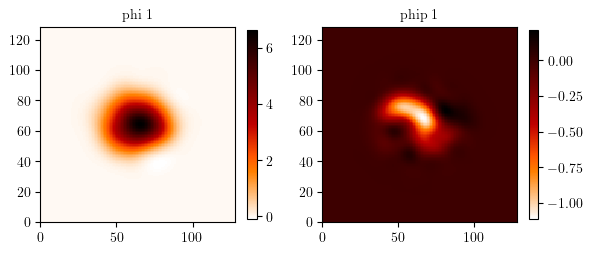

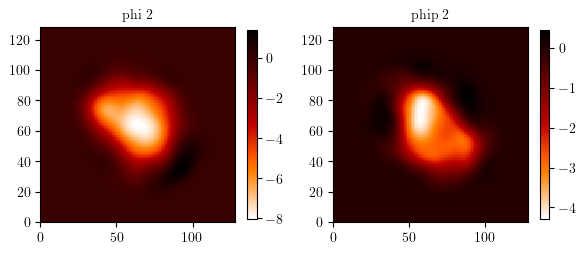

In [245]:
fig, axes = plt.subplots(1,2,figsize=(6,3),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(phi_1_i[:,64])
axes[0].set_title("phi 1")
fig.colorbar(mesh, shrink=.7)

mesh = axes[1].pcolormesh(phip_1_i[:,64])
axes[1].set_title("phip 1")
fig.colorbar(mesh, shrink=.7)

plt.show()

fig, axes = plt.subplots(1,2,figsize=(6,3),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(phi_2_i[:,64])
axes[0].set_title("phi 2")
fig.colorbar(mesh, shrink=.7)

mesh = axes[1].pcolormesh(phip_2_i[:,64])
axes[1].set_title("phip 2")
fig.colorbar(mesh, shrink=.7)

plt.show()

# Add Oscillons to background

In [246]:
pad = 96
shape_bg = tuple(dim_x+pad for dim_x in shape_i)

phi_1_bg, phip_1_bg, phi_2_bg, phip_2_bg = add_field_to_background(np.zeros(shape_bg), phi_1_i, phip_1_i, phi_2_i, phip_2_i)
phi_1_bg, phip_1_bg, phi_2_bg, phip_2_bg = smooth_edge(40, 0.1, 4, phi_1_bg, phip_1_bg, phi_2_bg, phip_2_bg)

In [247]:
L_bg = L_pr * np.array(shape_bg)/shape_i
L_bg

array([0.40195225, 0.40195225, 0.40195225])

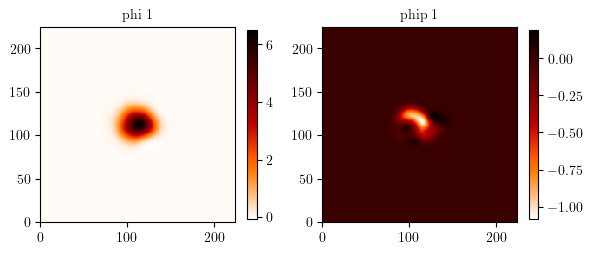

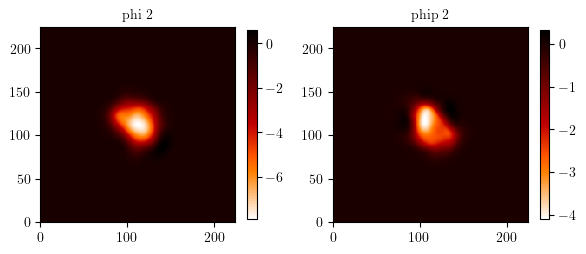

In [248]:
fig, axes = plt.subplots(1,2,figsize=(6,3),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(phi_1_bg[:,shape_bg[0]//2])
axes[0].set_title("phi 1")
fig.colorbar(mesh, shrink=.7)

mesh = axes[1].pcolormesh(phip_1_bg[:,shape_bg[0]//2])
axes[1].set_title("phip 1")
fig.colorbar(mesh, shrink=.7)

plt.show()

fig, axes = plt.subplots(1,2,figsize=(6,3),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(phi_2_bg[:,shape_bg[0]//2])
axes[0].set_title("phi 2")
fig.colorbar(mesh, shrink=.7)

mesh = axes[1].pcolormesh(phip_2_bg[:,shape_bg[0]//2])
axes[1].set_title("phip 2")
fig.colorbar(mesh, shrink=.7)

plt.show()

# Interpolate to final size

In [249]:
shape_ext = (256,256,256)

In [250]:
phi_1_ext, phip_1_ext, phi_2_ext, phip_2_ext = interpolate(shape_ext, phi_1_bg, phip_1_bg, phi_2_bg, phip_2_bg)

In [251]:
Edens_1_ext = get_Edens_pr(phi_1_ext,phip_1_ext, a, ap, alpha, beta, phi_0, L_bg/shape_ext)
Edens_2_ext = get_Edens_pr(phi_2_ext,phip_2_ext, a, ap, alpha, beta, phi_0, L_bg/shape_ext)

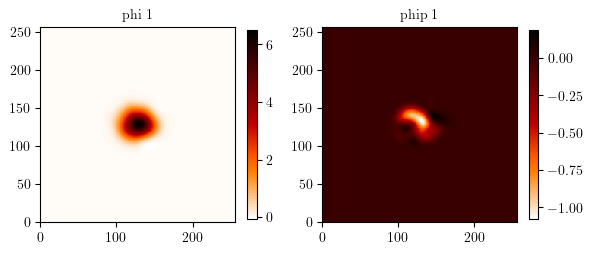

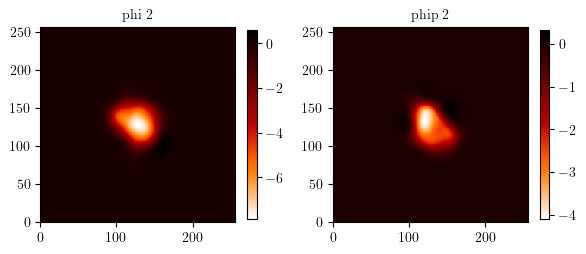

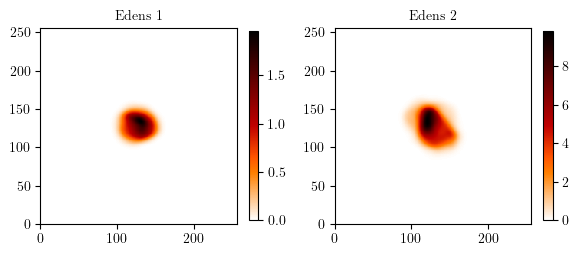

In [252]:
fig, axes = plt.subplots(1,2,figsize=(6,3),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(phi_1_ext[:,shape_ext[0]//2])
axes[0].set_title("phi 1")
fig.colorbar(mesh, shrink=.7)

mesh = axes[1].pcolormesh(phip_1_ext[:,shape_ext[0]//2])
axes[1].set_title("phip 1")
fig.colorbar(mesh, shrink=.7)

plt.show()

fig, axes = plt.subplots(1,2,figsize=(6,3),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(phi_2_ext[:,shape_ext[0]//2])
axes[0].set_title("phi 2")
fig.colorbar(mesh, shrink=.7)

mesh = axes[1].pcolormesh(phip_2_ext[:,shape_ext[0]//2])
axes[1].set_title("phip 2")
fig.colorbar(mesh, shrink=.7)

plt.show()

fig, axes = plt.subplots(1,2,figsize=(6,3),tight_layout=True)

for ax in axes:
    ax.set_aspect('equal')

mesh = axes[0].pcolormesh(Edens_1_ext[:,shape_ext[0]//2])
axes[0].set_title("Edens 1")
fig.colorbar(mesh, shrink=.7)

mesh = axes[1].pcolormesh(Edens_2_ext[:,shape_ext[0]//2])
axes[1].set_title("Edens 2")
fig.colorbar(mesh, shrink=.7)

plt.show()

# Add boost to oscillons

In [253]:
c_pr = 1/a**(rescale_s+1) # Speed limit in code units
c_pr

0.004496990583251169

In [254]:
M_1 = Edens_1_ext.sum() * np.product(L_bg/shape_ext)
M_2 = Edens_2_ext.sum() * np.product(L_bg/shape_ext)

M_1, M_2

(0.00026328038770948156, 0.002032869956455881)

In [255]:
r_pr = L_bg[0]/2

In [256]:
v_1 = 1/(data_1.rescale_A*a**data_1.rescale_r) * (2*M_1/r_pr)**.5
v_2 = 1/(data_1.rescale_A*a**data_1.rescale_r) * (2*M_2/r_pr)**.5

In [257]:
v_1/c_pr, v_2/c_pr

(0.009711837880798215, 0.02698652522024902)

In [258]:
"""
View momentum before applying boost.
"""

momenta_1 = get_momenta_pr(phi_1_ext, phip_1_ext, a, ap, alpha, beta, phi_0, dxdydz_pr=L_bg/shape_ext)
field_speed_1 = get_field_speed_pr(momenta_1, Edens_1_ext, a, alpha)

field_speed_1/c_pr, momenta_1.sum(axis=(1,2,3))

(array([-0.03750715, -0.02481312,  0.03291547]),
 array([-567292.52204662, -375296.34450413,  497843.75361794]))

In [259]:
boost = np.array([0.1546, 0.1415, -0.1388]) * c_pr

grad = gradient_discrete(phi_1_ext, L_bg/shape_ext, stencil=5)
phip_1_ext_boost = phip_1_ext - np.sum([boost_x*grad_x for boost_x,grad_x in zip(boost,grad)],axis=0)

Edens_1_boost = get_Edens_pr(
    phi_1_ext, phip_1_ext_boost, a, ap, alpha, beta, phi_0, L_bg/shape_ext
    )

momenta_1_boost = get_momenta_pr(phi_1_ext, phip_1_ext_boost, a, ap, alpha, beta, phi_0, L_bg/shape_ext)
field_speed_1_boost = get_field_speed_pr(momenta_1_boost, Edens_1_boost, a, alpha)
field_speed_1_boost/c_pr, momenta_1_boost.sum(axis=(1,2,3)), 

(array([1.00369863e-02, 2.98292680e-05, 1.88764354e-05]),
 array([150872.34821673,    448.38276955,    283.74375074]))

In [260]:
"""
View momentum before applying boost.
"""

momenta_2 = get_momenta_pr(phi_2_ext, phip_2_ext, a, ap, alpha, beta, phi_0, dxdydz_pr=L_bg/shape_ext)
field_speed_2 = get_field_speed_pr(momenta_2, Edens_2_ext, a, alpha)

field_speed_2/c_pr, momenta_2.sum(axis=(1,2,3))

(array([-0.0241002 , -0.06403289,  0.01385003]),
 array([-2814522.71762149, -7478030.93853068,  1617464.98439697]))

In [261]:
boost = np.array([0.5833, 0.8478, -0.2234]) * c_pr

grad = gradient_discrete(phi_2_ext, L_bg/shape_ext, stencil=5)
phip_2_ext_boost = phip_2_ext - np.sum([boost_x*grad_x for boost_x,grad_x in zip(boost,grad)],axis=0)

Edens_2_boost = get_Edens_pr(
    phi_2_ext, phip_2_ext_boost, a, ap, alpha, beta, phi_0, L_bg/shape_ext
    )

momenta_2_boost = get_momenta_pr(phi_2_ext, phip_2_ext_boost, a, ap, alpha, beta, phi_0, L_bg/shape_ext)
field_speed_2_boost = get_field_speed_pr(momenta_2_boost, Edens_2_boost, a, alpha)
field_speed_2_boost/c_pr, momenta_2_boost.sum(axis=(1,2,3)), 

(array([ 1.00119424e-02,  4.93605633e-06, -5.30889145e-07]),
 array([ 1.13077660e+06,  5.57491921e+02, -5.99600955e+01]))

# Flip oscillon

In [262]:
phi_1_f = phi_1_ext#.transpose(2,0,1)
phip_1_f = phip_1_ext_boost#.transpose(2,0,1)

In [263]:
phi_2_f = phi_2_ext[::-1,:,:]#.transpose(2,0,1)[::-1,:,:]
phip_2_f = phip_2_ext_boost[::-1,:,:]#.transpose(2,0,1)[::-1,:,:]

# Fit oscillons onto same grid

In [264]:
dx_pr = (L_bg/shape_ext)[0]
dx_pr

0.0015701259765625

In [265]:
mass = get_mass(alpha,beta)
T_pr = 2*np.pi/mass * data_1.rescale_B*a**(data_1.rescale_s)
T_pr

14.078232070494753

In [266]:
D = 0.01*c_pr * T_pr
Dx = (7+0.5)*D
Dx, Dx/dx_pr

(0.004748225778737963, 3.0241049760435934)

In [267]:
N = shape_ext[0]
center_1 = (N//2+55,N//2,N//2)
center_2 = (N//2-55,N//2,N//2)

In [268]:
phi_1_sh, phip_1_sh = shift_volume(center_1, phi_1_f, phip_1_f)
phi_2_sh, phip_2_sh = shift_volume(center_2, phi_2_f, phip_2_f)

In [269]:
phi = phi_1_sh + phi_2_sh
phip = phip_1_sh + phip_2_sh

In [270]:
Edens = get_Edens_pr(phi,phip,a,ap,alpha,beta,phi_0,L_bg/shape_ext)

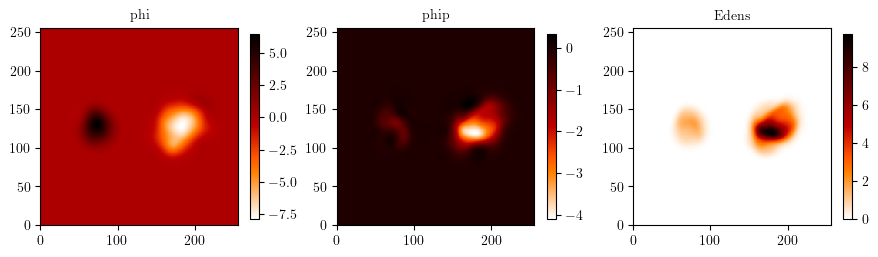

In [271]:
fig, axes = plt.subplots(1,3,figsize=(9,4),tight_layout=True)

mesh = axes[0].pcolormesh(phi[:,N//2].T)
fig.colorbar(mesh,shrink=.5)
axes[0].set_title("phi")

mesh = axes[1].pcolormesh(phip[:,N//2].T)
fig.colorbar(mesh,shrink=.5)
axes[1].set_title("phip")

mesh = axes[2].pcolormesh(Edens[:,N//2].T)
fig.colorbar(mesh,shrink=.5)
# axes[2].contour(Edens[:,N//2],levels=[1],colors='w')
axes[2].set_title("Edens")

for ax in axes:
    ax.set_aspect('equal')

plt.show()

# Save data

In [272]:
data_1.dt_pr, data_2.dt_pr

(0.001, 0.001)

In [273]:
dt_pr = 0.0005

phi_adv = phi + dt_pr/2*phip

In [274]:
L_bg, a, data_1.dt_pr, data_2.dt_pr, dt_pr/(L_bg/shape_ext)

(array([0.40195225, 0.40195225, 0.40195225]),
 4.2845540046691895,
 0.001,
 0.001,
 array([0.31844579, 0.31844579, 0.31844579]))

In [275]:
fname_o = "test smash.img"
output_dir = os.path.join(output_dir_1,f"../smash_{osc1}_{osc2}_0.01c_v1")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

n_points = np.product(shape_ext)

datname_o = f"test smash.dat"

with open(os.path.join(output_dir, datname_o), 'w') as dat:
#     dat.write(f"{osc1} is on the right and {osc2} is on the left.\n")
    dat.write(f"{osc1} is on the right and {osc1} is on the left.\n")
    dat.write(f"N = {shape_ext}\n")
    dat.write(f"L_pr = {L_bg}\n")
    dat.write(f"dt_pr = {dt_pr}\n")
    dat.write(f"alpha = {alpha}\n")
    dat.write(f"beta = {beta}\n")
    dat.write(f"f0 = {phi_0}\n")
    
    dat.write("\n")
    dat.write("Oscillons are given a boost of .005c toward each other\n")
    
    dat.write("\n")
    dat.write(f"output_dir is {output_dir}")

with open(os.path.join(output_dir,fname_o),'wb') as f_o:
    
    f_o.write(struct.pack('<i',-1))
    f_o.write(struct.pack('<f',0))
    f_o.write(struct.pack('<f',a))
    f_o.write(struct.pack('<f',0))
    
    f_o.write(struct.pack('<'+'f'*n_points,*phi_adv.flatten()))
    f_o.write(struct.pack('<'+'f'*n_points,*phip.flatten()))